In [1]:
import numpy as np

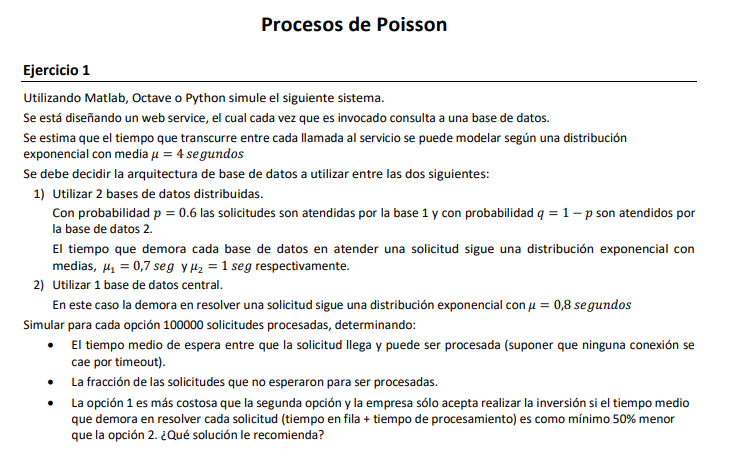

In [2]:
N_DIGITS = 5
MEDIA_LLAMADA = 4
N_SOLICITUDES = 100000

# 1) 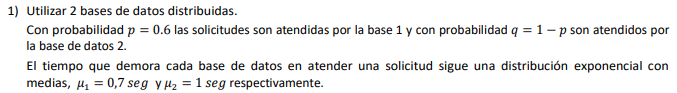

In [3]:
P_BASE_1 = 0.6
MEDIA_BASE_1 = 0.7

In [4]:
P_BASE_2 = 1 - P_BASE_1
MEDIA_BASE_2 = 1

In [5]:
next_llamada = lambda: round(np.random.exponential(MEDIA_LLAMADA), N_DIGITS)
next_base_1 = lambda: round(np.random.exponential(MEDIA_BASE_1), N_DIGITS)
next_base_2 = lambda: round(np.random.exponential(MEDIA_BASE_2), N_DIGITS)
next_base = lambda : (1, next_base_1())  if np.random.random() < P_BASE_1 else (2, next_base_2())

In [6]:
def armar_tiempo(tiempos_llamadas, tiempos_base):
    tiempos = []
    base_libre = 0
    for tiempo_llamada, tiempo_base in zip(tiempos_llamadas, tiempos_base):
        if base_libre > tiempo_llamada:
            tiempo_atendida = base_libre
        else:
            tiempo_atendida = tiempo_llamada
        base_libre = tiempo_atendida + tiempo_base
        tiempos.append( { "entrada_llamada": tiempo_llamada,
                          "tiempo_base": tiempo_base,
                          "atendida": tiempo_atendida,
                          "finalizacion": base_libre
        })
    return tiempos

In [7]:
def simulacion_bases(n_solicitudes):
    tiempos_llamadas = [0]
    tiempos_llamadas_base_1 = [0]
    tiempos_llamadas_base_2 = [0]
    tiempos_base_1 = [0]
    tiempos_base_2 = [0]

    for i in range(n_solicitudes):
        tiempos_llamadas.append(tiempos_llamadas[-1] + next_llamada())
        base, tiempo_en_atender = next_base()
        if base == 1:
            tiempos_llamadas_base_1.append(tiempos_llamadas[-1])
            tiempos_base_1.append(tiempo_en_atender)
        if base == 2:
            tiempos_llamadas_base_2.append(tiempos_llamadas[-1])
            tiempos_base_2.append(tiempo_en_atender)

    tiempos_llamadas = tiempos_llamadas[1:]
    base_1 = armar_tiempo(tiempos_llamadas_base_1[1:], tiempos_base_1[1:])
    base_2 = armar_tiempo(tiempos_llamadas_base_2[1:], tiempos_base_2[1:])
    return {"base1": base_1, "base2": base_2}

In [8]:
tiempos_op1 = simulacion_bases(N_SOLICITUDES)

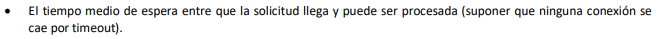

In [9]:
tiempo_promedio = np.mean([t["atendida"] - t["entrada_llamada"] for t in tiempos_op1["base1"]])
"Tiempo promedio base1: {:.5f} segundos".format(tiempo_promedio)

'Tiempo promedio base1: 0.08203 segundos'

In [10]:
tiempo_promedio = np.mean([t["atendida"] - t["entrada_llamada"] for t in tiempos_op1["base2"]])
"Tiempo promedio base2: {:.5f} segundos".format(tiempo_promedio)

'Tiempo promedio base2: 0.10802 segundos'

In [11]:
sin_espera_base_1 = sum([1 if t["atendida"] == t["entrada_llamada"] else 0 for t in tiempos_op1["base1"]])
"Solicitudes que no esperaron base_1: {}/{}".format(sin_espera_base_1, len(tiempos_op1["base1"]))

'Solicitudes que no esperaron base_1: 53580/59950'

In [12]:
sin_espera_base_2 = sum([1 if t["atendida"] == t["entrada_llamada"] else 0 for t in tiempos_op1["base2"]])
"Solicitudes que no esperaron base_1: {}/{}".format(sin_espera_base_2, len(tiempos_op1["base2"]))

'Solicitudes que no esperaron base_1: 36015/40050'

In [13]:
sin_espera_total = sin_espera_base_2 + sin_espera_base_2
total = len(tiempos_op1["base1"]) + len(tiempos_op1["base2"])
"Solicitudes que no esperaron total: {}/{} ({}%)".format(sin_espera_total, total, (sin_espera_total/total)*100)

'Solicitudes que no esperaron total: 72030/100000 (72.03%)'

# 2) 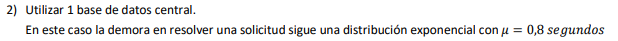

In [14]:
MEDIA_BASE = 0.8

In [15]:
next_base = lambda: round(np.random.exponential(MEDIA_BASE), N_DIGITS)

In [16]:
def simulacion_base(n_solicitudes):
    tiempos_llamadas = [0]
    tiempos_base = [0]
    for i in range(n_solicitudes):
        tiempos_llamadas.append(tiempos_llamadas[-1] + next_llamada())
        tiempos_base.append(next_base())
        
    base = armar_tiempo(tiempos_llamadas[1:], tiempos_base[1:])
    return {"base": base}

In [17]:
tiempos_op2 = simulacion_base(N_SOLICITUDES)

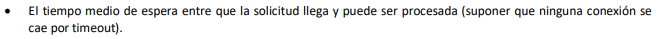

In [18]:
tiempo_promedio = np.mean([t["atendida"] - t["entrada_llamada"] for t in tiempos_op2["base"]])
"Tiempo promedio base: {:.5f} segundos".format(tiempo_promedio)

'Tiempo promedio base: 0.20458 segundos'

In [19]:
sin_espera_base_1 = sum([1 if t["atendida"] == t["entrada_llamada"] else 0 for t in tiempos_op2["base"]])
"Solicitudes que no esperaron base: {}/{}".format(sin_espera_base_1, len(tiempos_op2["base"]))

'Solicitudes que no esperaron base: 79830/100000'

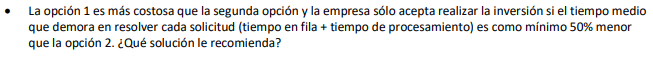

In [21]:
#opcion 1
tiempo_procesamiento_base_1 = [t["finalizacion"] - t["entrada_llamada"] for t in tiempos_op1["base1"]]
tiempo_procesamiento_base_2 = [t["finalizacion"] - t["entrada_llamada"] for t in tiempos_op1["base2"]]
tiempo_procesamiento_total_op1 = tiempo_procesamiento_base_1 + tiempo_procesamiento_base_2
assert len(tiempo_procesamiento_total_op1) == N_SOLICITUDES
tiempo_procesamiento_total_op1 = np.mean(tiempo_procesamiento_total_op1)
"Tiempo de procesamiento promedio: {:.5f} segundos".format(tiempo_procesamiento_total_op1)

'Tiempo de procesamiento promedio: 0.90889 segundos'

In [24]:
#opcion2
tiempo_procesamiento_total_op2 = [t["finalizacion"] - t["entrada_llamada"] for t in tiempos_op2["base"]]
assert len(tiempo_procesamiento_total_op2) == N_SOLICITUDES
tiempo_procesamiento_total_op2 = np.mean(tiempo_procesamiento_total_op2)
"Tiempo de procesamiento promedio: {:.5f} segundos".format(tiempo_procesamiento_total_op2)

'Tiempo de procesamiento promedio: 1.00714 segundos'

In [26]:
if tiempo_procesamiento_total_op1 < (0.5*tiempo_procesamiento_total_op2):
    print("Usar la opcion 1 con DOS bases de datos")
else:
    print("Usar la opcion 2 con UNA base de datos")

Usar la opcion 2 con UNA base de datos
